In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Heart_Disease_Prediction.csv')
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,270.0,54.433333,9.109067,29.0,48.0,55.0,61.0,77.0
Sex,270.0,0.677778,0.468195,0.0,0.0,1.0,1.0,1.0
Chest pain type,270.0,3.174074,0.950090,1.0,3.0,3.0,4.0,4.0
BP,270.0,131.344444,17.861608,94.0,120.0,130.0,140.0,200.0
Cholesterol,270.0,249.659259,51.686237,126.0,213.0,245.0,280.0,564.0
FBS over 120,270.0,0.148148,0.355906,0.0,0.0,0.0,0.0,1.0
EKG results,270.0,1.022222,0.997891,0.0,0.0,2.0,2.0,2.0
Max HR,270.0,149.677778,23.165717,71.0,133.0,153.5,166.0,202.0
Exercise angina,270.0,0.329630,0.470952,0.0,0.0,0.0,1.0,1.0
ST depression,270.0,1.050000,1.145210,0.0,0.0,0.8,1.6,6.2


In [3]:
df.columns.values

array(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol',
       'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina',
       'ST depression', 'Slope of ST', 'Number of vessels fluro',
       'Thallium', 'Heart Disease'], dtype=object)

In [4]:
df.nunique()

Age                         41
Sex                          2
Chest pain type              4
BP                          47
Cholesterol                144
FBS over 120                 2
EKG results                  3
Max HR                      90
Exercise angina              2
ST depression               39
Slope of ST                  3
Number of vessels fluro      4
Thallium                     3
Heart Disease                2
dtype: int64

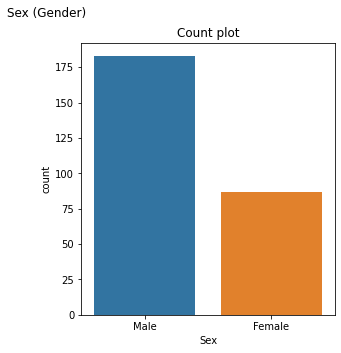

1    183
0     87
Name: Sex, dtype: int64
It can be noticed that predictor (Gender) is imbalance


In [5]:
labels = ['Male', 'Female']
order = df['Sex'].value_counts().index

plt.figure(figsize=(10,5))
plt.suptitle("Sex (Gender)")

plt.subplot(1,2,2)
plt.title('Count plot')
sns.countplot(x='Sex', data=df, order=order)
plt.xticks([0, 1], labels)

plt.show()

print(df['Sex'].value_counts())
print("It can be noticed that predictor (Gender) is imbalance")

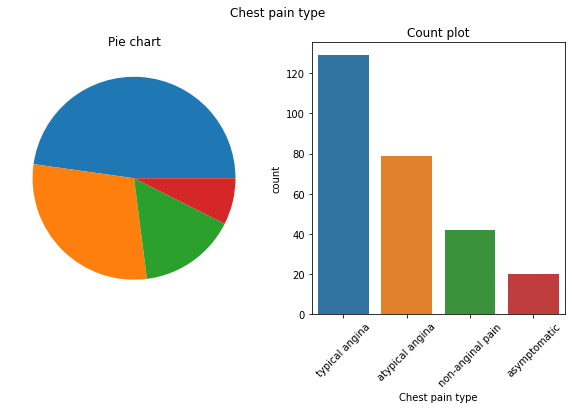

4    129
3     79
2     42
1     20
Name: Chest pain type, dtype: int64

In [6]:
labels = ["typical angina", "atypical angina", "non-anginal pain", "asymptomatic"]
order = df['Chest pain type'].value_counts().index

plt.figure(figsize=(10,5))
plt.suptitle("Chest pain type")

plt.subplot(1,2,1)
plt.title('Pie chart')
plt.pie(df['Chest pain type'].value_counts(), textprops={'fontsize':12})
plt.subplots_adjust(left=0.125)

plt.subplot(1,2,2)
plt.title('Count plot')
sns.countplot(x='Chest pain type', data=df, order=order)
plt.xticks([0,1,2,3], labels, rotation=45)

plt.show()

df['Chest pain type'].value_counts()


In [7]:
target = df['Heart Disease'].map({'Presence':1, 'Absence':0})
inputs = df.drop(['Heart Disease'], axis=1)

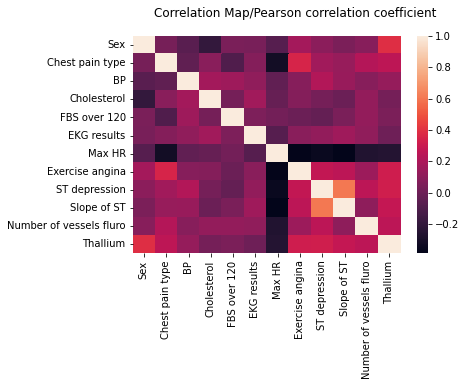

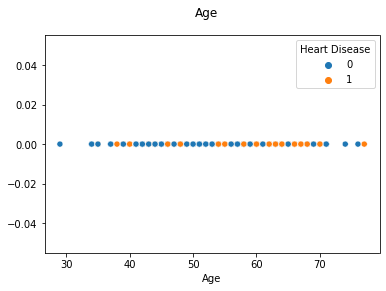

In [8]:
plt.suptitle("Correlation Map/Pearson correlation coefficient")
sns.heatmap(df.iloc[:,1:-1].corr())

plt.show()

plt.suptitle("Age")
sns.scatterplot(data=df, x='Age', y=np.zeros(len(df['Age'])), hue=target)
plt.show()

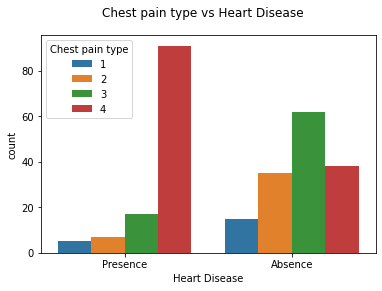

In [9]:
plt.suptitle('Chest pain type vs Heart Disease')
sns.countplot(data=df, x='Heart Disease', hue='Chest pain type')
plt.show()

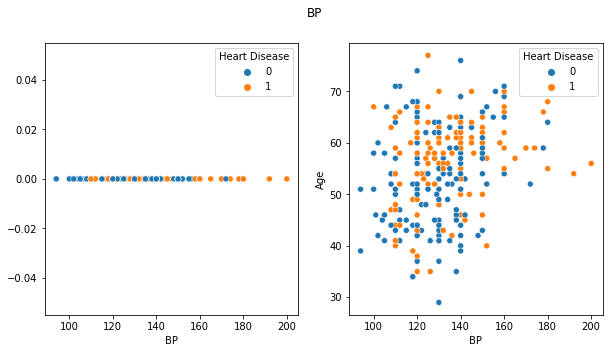

In [10]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.suptitle("BP")
sns.scatterplot(data=df, x='BP', y=np.zeros(len(df['BP'])), hue=target)

plt.subplot(1,2,2)
sns.scatterplot(data=df, x='BP', y='Age', hue=target)


plt.show()

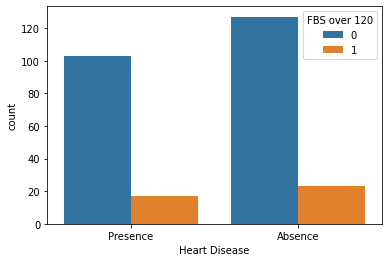

In [11]:
ax = sns.countplot(x='Heart Disease', hue='FBS over 120', data=df)
plt.show()

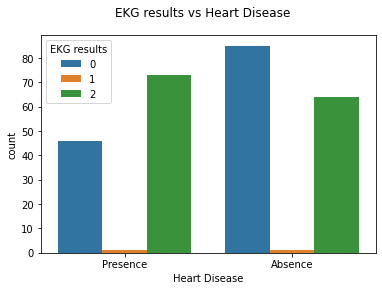

In [12]:
plt.suptitle('EKG results vs Heart Disease')
sns.countplot(data=df, x='Heart Disease', hue='EKG results')
plt.show()

In [13]:
Chest_pain_type = pd.get_dummies(df['Chest pain type'], prefix='Chest pain type', drop_first=True)
EKG_results = pd.get_dummies(df['EKG results'], prefix='EKG results', drop_first=True)
Number_of_vessels_fluro = pd.get_dummies(df['Number of vessels fluro'], prefix='Number of vessels fluro', drop_first=True)
Thallium = pd.get_dummies(df['Thallium'], prefix='Thallium', drop_first=True)

frames = [df, Chest_pain_type, EKG_results, Number_of_vessels_fluro, Thallium]
df = pd.concat(frames, axis=1)

df.drop(columns = ['Chest pain type', 'EKG results', 'Number of vessels fluro', 'Thallium', 'Slope of ST'])

target = df['Heart Disease'].map({'Presence':1, 'Absence':0})
inputs = df.drop(['Heart Disease'], axis=1)

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,270.0,54.433333,9.109067,29.0,48.0,55.0,61.0,77.0
Sex,270.0,0.677778,0.468195,0.0,0.0,1.0,1.0,1.0
Chest pain type,270.0,3.174074,0.950090,1.0,3.0,3.0,4.0,4.0
BP,270.0,131.344444,17.861608,94.0,120.0,130.0,140.0,200.0
Cholesterol,270.0,249.659259,51.686237,126.0,213.0,245.0,280.0,564.0
FBS over 120,270.0,0.148148,0.355906,0.0,0.0,0.0,0.0,1.0
EKG results,270.0,1.022222,0.997891,0.0,0.0,2.0,2.0,2.0
Max HR,270.0,149.677778,23.165717,71.0,133.0,153.5,166.0,202.0
Exercise angina,270.0,0.329630,0.470952,0.0,0.0,0.0,1.0,1.0
ST depression,270.0,1.050000,1.145210,0.0,0.0,0.8,1.6,6.2
